In [1]:
import numpy as np
import cv2 as cv
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
%matplotlib inline

Question 01

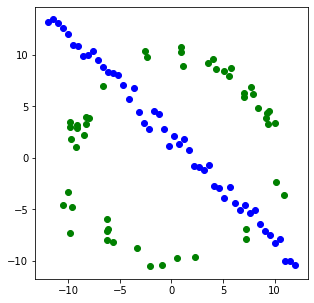

In [2]:
# np . random . seed ( 0 )
N = 100
half_n = N// 2
r = 10
s = r /16
t = np.random.uniform(0, 2*np.pi, half_n )

n = s*np.random.randn(half_n)
x, y = (r+n)*np.cos(t),(r+n)*np.sin(t)

X_circ = np.hstack((x.reshape(half_n,1), y.reshape(half_n, 1)))

m, b = -1, 2
xxx = np.linspace(-12, 12, half_n)
yyy = m*xxx + b + s*np.random.randn(half_n)
X_line = np.hstack((xxx.reshape(half_n,1) , yyy.reshape(half_n,1)))

X = np.vstack((X_circ , X_line))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.plot(x,y,'o',color='green')
ax.plot(xxx,yyy,'o', color = 'blue')
ax.set_aspect('equal')

plt.show()

In [3]:
p, s, e = 0.99, 3, 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))

In [4]:
def findCircle(x1, y1, x2, y2, x3, y3) :
	B = (x1**2 + y1**2)*(y2-y3) + (x2**2+y2**2)*(y3-y1) + (x3**2 + y3**2)*(y1-y2)
	A = x1*(y2-y3) - y1*(x2-x3) + x2*y3 - x3*y2
	C = (x1**2 + y1**2)*(x2-x3) + (x2**2 + y2**2)*(x3-x1) + (x3**2 + y3**2)*(x1-x2)
	D = (x1**2 + y1**2)*(x3*y2-x2*y3) + (x2**2 + y2**2)*(x1*y3-x3*y1) + (x3**2+y3**2)*(x2*y1 - x1*y2)
	
	H = B/(2*A)
	K = -C/(2*A)
	R = np.sqrt((B**2 + C**2 - 4*A*D)/(4*(A**2)))
	L = [H,K,R]
	return L

In [5]:
def drawCircle(x0,y0,r,PX,PY):
    theta = np.linspace(0, 2*np.pi,360)
    xx , yy = x0 + r*np.cos(theta) , y0 + r*np.sin(theta)
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot()
    ax.plot(xx,yy,color='green')
    ax.plot(x,y,'o')
    ax.plot(PX,PY,'o',color = 'red')
    ax.set_aspect('equal')
    ax.grid('on')
    plt.show()

In [6]:
def randomN(n, t):
    l = np.random.randint(n, size=t)
    m = np.zeros(np.shape(l))
    
    for i in range(len(l)): m[i] = np.sum(l==l[i])
    if np.sum(m) == len(m): return l
    else: return randomN(n,t)

In [7]:
def pointToCircle(hh,kk,r,x11,y11):
    return (np.abs(np.sqrt((x11-hh)**2+(y11-kk)**2)-r))

In [8]:
ransac , inlier_set , max_inliers = [] , [], 0
total_points = len(x)

for i in range(N):
    point1, point2, point3 = randomN(total_points,3)
    inliers, inlier_set = 0, []
    center_x, center_y, radius = findCircle(x[point1],y[point1],x[point2],y[point2],x[point3],y[point3])
    
    for j in range(total_points):
        d = pointToCircle(center_x,center_y,radius,x[j],y[j])
        if d<1:
            inliers+=1
            inlier_set.append([x[j],y[j]])
                
    if inliers > max_inliers:
        ransac = [point1,point2,point3]
        max_inliers = inliers
        ransac_center_x, ransac_center_y, ransac_radius = center_x, center_y, radius
        ransac_set = inlier_set

In [9]:
ransac_x, ransac_y = [],[]
for h in ransac_set:
    ransac_x.append(h[0])
    ransac_y.append(h[1])

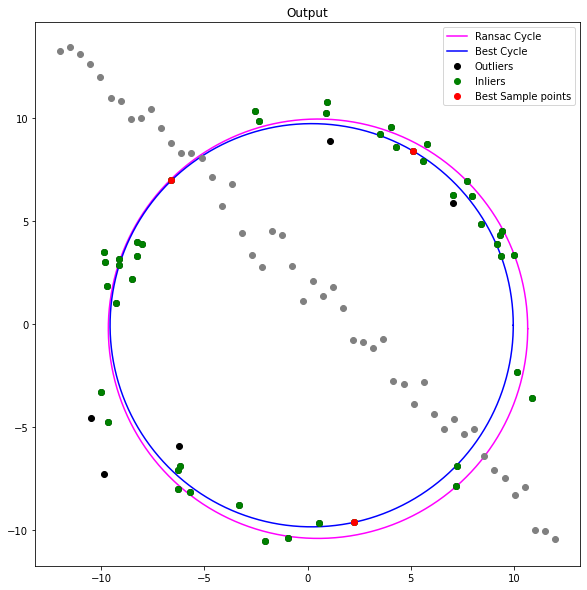

In [19]:
#Next draw the Best circle using the choosen ransac circle's inliers as the point
best = []
max_inliers = 0
total_points = len(ransac_set)

for i in range(N): 
    point1, point2, point3 = randomN(total_points,3)
    inliers = 0
    
    center_x, center_y, radius = findCircle(ransac_x[point1],ransac_y[point1],ransac_x[point2],ransac_y[point2],ransac_x[point3],ransac_y[point3])
    
    for j in range(total_points):
        d = pointToCircle(center_x,center_y,radius,ransac_x[j],ransac_y[j])
        if d<1:
            inliers+=1

    if inliers > max_inliers:
        best = [point1,point2,point3]
        max_inliers = inliers
        best_center_x, best_center_y, best_radius = center_x, center_y, radius
        
theta = np.linspace(0,2*np.pi,360)
best_x , best_y = best_center_x + best_radius*np.cos(theta) , best_center_y + best_radius*np.sin(theta)
ran_best_x , ran_best_y = ransac_center_x + ransac_radius*np.cos(theta) , ransac_center_y + ransac_radius*np.sin(theta)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.plot(ran_best_x, ran_best_y, "magenta" , label = "Ransac Cycle") ; #plot RANSAC cycle
ax.plot(best_x,best_y,color='Blue', label = "Best Cycle") ;  #plot best cycle
ax.plot(x,y,'o', color = 'black', label = "Outliers") ; #plot all points in circle
ax.plot(ransac_x,ransac_y,'o', color = 'green', label = "Inliers") ; #plot inliers
ax.plot(xxx,yyy,'o', color = 'gray') ; #plot line

ax.plot([ransac_x[best[0]],ransac_x[best[1]],ransac_x[best[2]]], [ransac_y[best[0]],ransac_y[best[1]],ransac_y[best[2]]], 'o', color = 'red', label = 'Best Sample points')   #plot best sample points

ax.set_aspect('equal')
leg = ax.legend()
plt.title("Output")
plt.show()

Question 02

In [11]:
def computeHomography(fromPoints, toPoints):
    x_dash_1, y_dash_1, x_dash_2, y_dash_2, x_dash_3, y_dash_3, x_dash_4, y_dash_4 = toPoints[0], toPoints[1], toPoints[2], toPoints[3], toPoints[4], toPoints[5], toPoints[6], toPoints[7]
    x1T, x2T, x3T, x4T = fromPoints[0], fromPoints[1], fromPoints[2], fromPoints[3]
    zero_matrix = np.array([[0],[0],[0]])
    
    #make the matrix A
    a = np.concatenate((zero_matrix.T,x1T, -y_dash_1*x1T), axis=1)
    b = np.concatenate((x1T,zero_matrix.T, -x_dash_1*x1T), axis=1)

    c = np.concatenate((zero_matrix.T,x2T, -y_dash_2*x2T), axis=1)
    d = np.concatenate((x2T,zero_matrix.T, -x_dash_2*x2T), axis=1)

    e = np.concatenate((zero_matrix.T,x3T, -y_dash_3*x3T), axis=1)
    f = np.concatenate((x3T,zero_matrix.T, -x_dash_3*x3T), axis=1)

    g = np.concatenate((zero_matrix.T,x4T, -y_dash_4*x4T), axis=1)
    h = np.concatenate((x4T,zero_matrix.T, -x_dash_4*x4T), axis=1)

    A = np.concatenate((a,b,c,d,e,f,g,h), axis=0, dtype = np.float64)

    A_transpose_times_A = (A.T)@A
    W,V = np.linalg.eig(A_transpose_times_A)
    temph = V[:, np.argmin(W)]
    H = temph.reshape((3,3))
    return H    

In [12]:
def oneImageOnTopOfOther(background_image, foreground_image):
    #code for get the mouse click points
    corners = []
    def click_left_button(event, x, y, flags, params):
        if event == cv.EVENT_LBUTTONDOWN:
            corners.append([x,y])
            
    img = cv.imread(background_image)
    cv.imshow('image', img)
    cv.setMouseCallback('image', click_left_button)
    cv.waitKey(0)
    cv.destroyAllWindows()

    height, width = np.shape(img)[0],np.shape(img)[1]
    zero_matrix = np.array([[0],[0],[0]])

    #points corresponding to mouse clicking
    toPoints  = [ corners[0][0], corners[0][1], corners[1][0], corners[1][1], corners[2][0], corners[2][1], corners[3][0], corners[3][1]]

    flag = cv.imread(foreground_image)
    flag_height , flag_width = np.shape(flag)[0] , np.shape(flag)[1]
    #corner positions of the flag
    fromPoints = [np.array([[0,0,1]]), np.array([[flag_width-1, 0,1]]), np.array([[flag_width-1, flag_height-1, 1]]), np.array([[0,flag_height-1,1]])]

    flag_transformed = cv.warpPerspective(flag, computeHomography(fromPoints, toPoints),(width,height))
    output = cv.add(flag_transformed,img)

    fig, ax = plt.subplots(1,3,figsize=(20,20))
    ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) ; ax[0].set_title("Background Image")
    ax[1].imshow(cv.cvtColor(flag_transformed, cv.COLOR_BGR2RGB)) ; ax[1].set_title("Transformed foreground only")
    ax[2].imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB)) ; ax[2].set_title("Final output")
    plt.show()

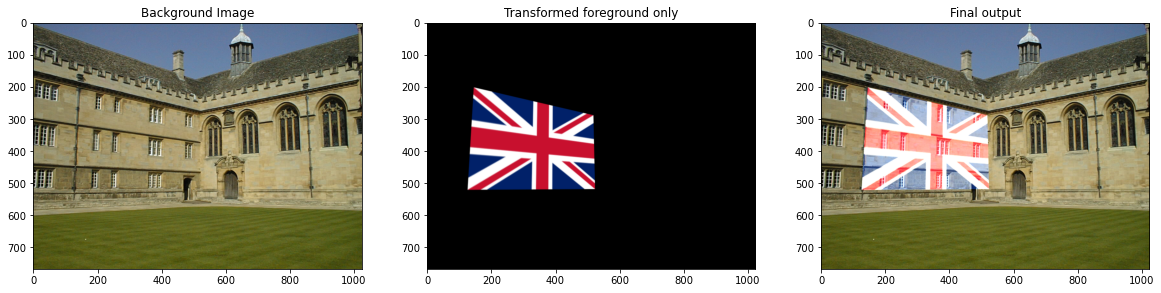

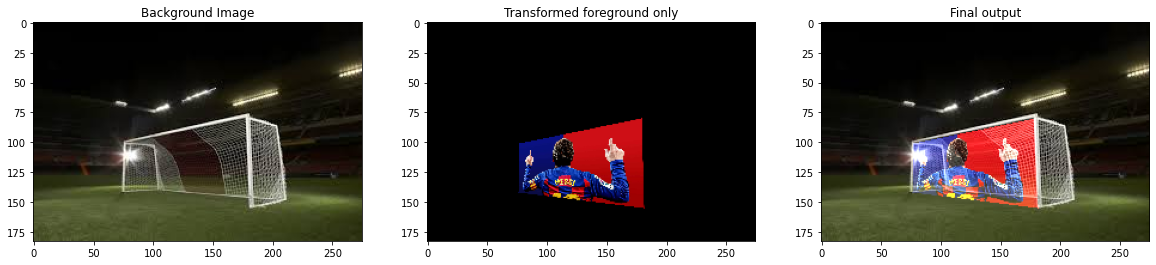

In [13]:
oneImageOnTopOfOther('001.jpg','flag.png')
oneImageOnTopOfOther('Goal.jpg','messi.jpg')

Question 3

In [14]:
img1_original = cv.imread('graf/img1.ppm')
img5_original = cv.imread('graf/img5.ppm')

img1 = cv.cvtColor(img1_original, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(cv.imread('graf/img2.ppm'), cv.COLOR_BGR2GRAY)
img3 = cv.cvtColor(cv.imread('graf/img3.ppm'), cv.COLOR_BGR2GRAY)
img4 = cv.cvtColor(cv.imread('graf/img4.ppm'), cv.COLOR_BGR2GRAY)
img5 = cv.cvtColor(img5_original, cv.COLOR_BGR2GRAY)

images = [img1, img2, img3, img4, img5]

Text(0.5, 1.0, 'Image 1 to Image 5')

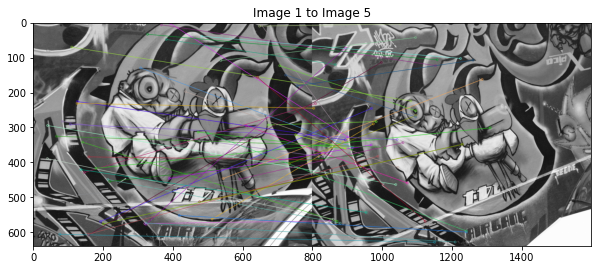

In [27]:
sift = cv.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_5, descriptors_5 = sift.detectAndCompute(img5,None)
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_5)
matches = sorted(matches, key = lambda x:x.distance)
Matched = cv.drawMatches(img1, keypoints_1, img2, keypoints_5, matches[:50], img5, flags=2)
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(Matched)
ax.set_title("Image 1 to Image 5")

In [15]:
p,s,e = 0.99, 4, 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))

In [16]:
set_of_H_values = []
for t in range(4):
    sift = cv.xfeatures2d.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(images[t],None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(images[t+1],None)

    bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)

    list_kp1 = [keypoints_1[mat.queryIdx].pt for mat in matches] 
    list_kp2 = [keypoints_2[mat.trainIdx].pt for mat in matches]

    threshold, best_inliers, best_H = 2, 0, 0

    for k in range(N):
        four_random_points = randomN(len(list_kp1)-1,4)

        fromPoints = []
        for i in range(4): fromPoints.append(np.array([[list_kp1[four_random_points[i]][0], list_kp1[four_random_points[i]][1], 1]]))

        toPoints = []
        for j in range(4): 
            toPoints.append(list_kp2[four_random_points[j]][0])
            toPoints.append(list_kp2[four_random_points[j]][1])
        
        H = computeHomography(fromPoints, toPoints)

        inliers = 0
        for i in range(len(list_kp1)):
            X = [list_kp1[i][0], list_kp1[i][1], 1]
            hX = H@X
            hX /= hX[-1]
            error = np.sqrt(np.power(hX[0]-list_kp2[i][0],2) + np.power(hX[1]-list_kp2[i][1],2))
            if error < threshold: inliers+=1
        
        if inliers > best_inliers:
            best_inliers = inliers
            best_H = H

    set_of_H_values.append(best_H)

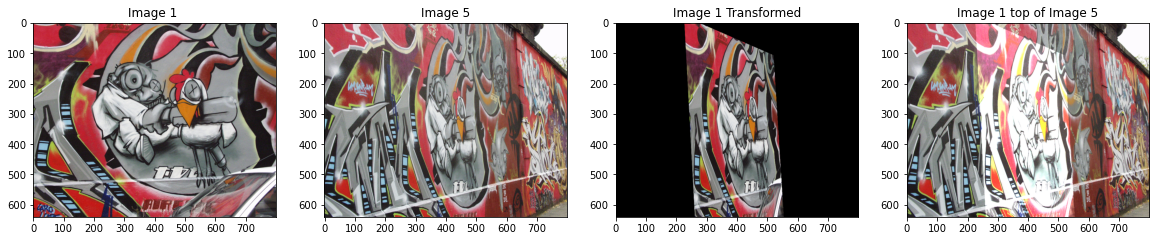

In [17]:
H_1_to_5 = set_of_H_values[3] @ set_of_H_values[2] @ set_of_H_values[1] @ set_of_H_values[0]
H_1_to_5 /= H_1_to_5[-1][-1]

transformed = cv.warpPerspective(img1_original, H_1_to_5 ,(np.shape(img5_original)[1] ,np.shape(img5_original)[0]))

fig, ax = plt.subplots(1,4,figsize=(20,20))
ax[0].imshow(cv.cvtColor(img1_original,cv.COLOR_BGR2RGB)) ; ax[0].set_title("Image 1 ")
ax[1].imshow(cv.cvtColor(img5_original,cv.COLOR_BGR2RGB)) ; ax[1].set_title("Image 5")
ax[2].imshow(cv.cvtColor(transformed, cv.COLOR_BGR2RGB)) ; ax[2].set_title("Image 1 Transformed")
output = cv.add(img5_original,transformed)

ax[3].imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB)) ;  ax[3].set_title("Image 1 top of Image 5")
plt.show()

In [18]:
print(H_1_to_5)

[[ 6.13683656e-01  5.37456350e-02  2.23749490e+02]
 [ 2.11203247e-01  1.14989904e+00 -1.87868982e+01]
 [ 4.72894413e-04 -3.76507319e-05  1.00000000e+00]]


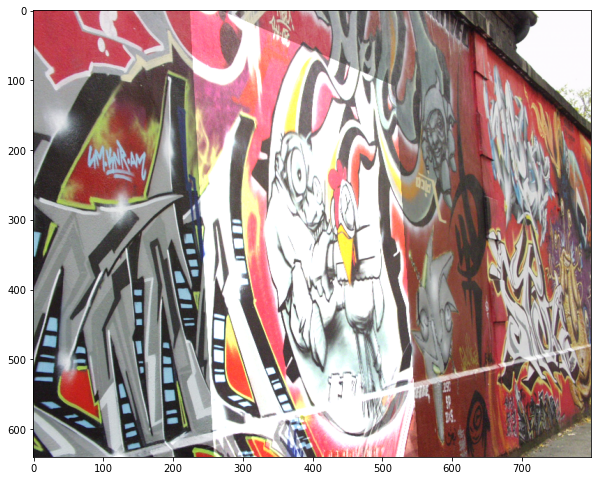

In [29]:
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.show()